In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
# import acquire
import prepare
import wrangle
from wordcloud import WordCloud
import nltk.sentiment
# pd.set_option('display.max_colwidth', None)
from time import strftime
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import os

In [2]:
# df=acquire.make_json(cached=True)
df = pd.read_json('repo_readmes.json')
df.head()

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,[![Github Build Status](https://github.com/bit...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...


In [3]:
df.shape

(960, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             960 non-null    object
 1   language         960 non-null    object
 2   readme_contents  960 non-null    object
dtypes: object(3)
memory usage: 30.0+ KB


In [5]:
# # SPLIT
# from sklearn.model_selection import train_test_split
# # Test set is .2 of original dataframe
# train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.language)
# # The remainder is here divided .7 to train and .3 to validate
# train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.language)
# train.shape, validate.shape, test.shape


In [6]:
# train.shape, validate.shape, test.shape

In [7]:
# X_train = train.drop(columns=['language'])
# y_train = pd.DataFrame(train.language, columns=['language'])

# X_validate = validate.drop(columns=['language'])
# y_validate = pd.DataFrame(validate.language, columns=['language'])

# X_test = test.drop(columns=['language'])
# y_test = pd.DataFrame(test.language, columns=['language'])

# train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape


In [9]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
wrangle.split_repos(df)

In [13]:
df.language.value_counts(normalize = True)

Java          0.2
C++           0.2
HTML          0.1
C             0.1
Wikitext      0.1
AsciiDoc      0.1
TypeScript    0.1
Python        0.1
Name: language, dtype: float64

In [73]:
df[df.language=='Wikitext']

,repo,language,readme_contents
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
13,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
23,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
33,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
43,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
...,...,...,...
913,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
923,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
933,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
943,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."


In [75]:
# combine all contents in single string by language

from prepare import *

java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
c_plus_plus__words = basic_clean(' '.join(df[df.language == 'C++'].readme_contents))
wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].readme_contents))
type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
c_words = basic_clean(' '.join(df[df.language == 'C'].readme_contents))
ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].readme_contents))
python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
html_words = basic_clean(' '.join(df[df.language == 'HTML'].readme_contents))
all_words = basic_clean(' '.join(df.readme_contents))

In [77]:
java_words

'github build statushttpsgithubcombitcoinjbitcoinjworkflowsjava20cibadgesvghttpsgithubcombitcoinjbitcoinjactions\ngitlab build statushttpsgitlabcombitcoinjbitcoinjbadgesmasterpipelinesvghttpsgitlabcombitcoinjbitcoinjpipelines\ncoverage statushttpscoverallsioreposbitcoinjbitcoinjbadgepngbranchmasterhttpscoverallsiorbitcoinjbitcoinjbranchmaster\n\nvisit our irc channelhttpskiwiirccombuttonsircfreenodenetbitcoinjpnghttpskiwiirccomclientircfreenodenetbitcoinj\n\n welcome to bitcoinj\n\nthe bitcoinj library is a java implementation of the bitcoin protocol which allows it to maintain a wallet and sendreceive transactions without needing a local copy of bitcoin core it comes with full documentation and some example apps showing how to use it\n\n technologies\n\n java 8 needs java 8 api or android 70 api compiles to java 8 bytecode and gradle 44 for the core module\n java 11 and gradle 44 for tools wallettool and examples\n java 11 and gradle 410 for the javafxbased wallettemplate\n gradlehttp

In [78]:
languages_words_list = [
java_words,
c_plus_plus__words,
wiki_words,
type_words,
c_words,
ascii_words,
python_words,
html_words
]


In [79]:
# represent contents as word frequencies

java_freq = pd.Series(java_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus__words.split()).value_counts()
wiki_freq = pd.Series(wiki_words.split()).value_counts()
type_freq = pd.Series(type_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
ascii_freq = pd.Series(ascii_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()


In [80]:

word_counts = pd.concat([java_freq, c_plus_plus_freq, wiki_freq, type_freq,c_freq, ascii_freq, python_freq, html_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['Java', 'C++', 'Wiki', 'Type', 'C', 'ASCII', 'Python', 'HTML', 'ALL']
word_counts.head()

,Java,C++,Wiki,Type,C,ASCII,Python,HTML,ALL
the,4512,3648,530,3744,96,2400,1632,768,17760
and,2304,2496,530,4224,192,1056,288,192,11712
to,2016,2016,318,2592,192,1248,864,288,9792
for,1632,1824,1696,1632,192,384,288,96,9120
a,1536,864,583,5568,96,1728,384,576,11808


In [109]:
java_words_series = pd.Series(java_words.split())
java_words_series.value_counts()

the          4512
and          2304
to           2016
for          1632
a            1536
             ... 
acquiring      96
youll          96
include        96
javadocs       96
hardware       96
Length: 310, dtype: int64

In [107]:
temp.value_counts()

the          4512
and          2304
to           2016
for          1632
a            1536
             ... 
acquiring      96
youll          96
include        96
javadocs       96
hardware       96
Length: 310, dtype: int64

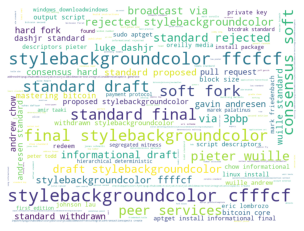

In [93]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

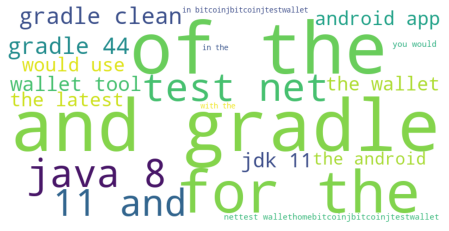

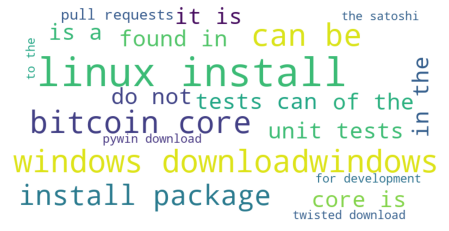

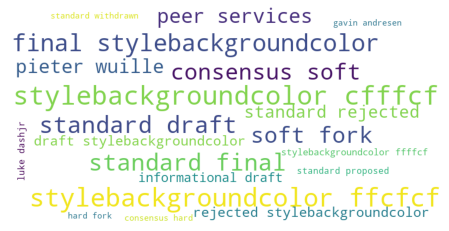

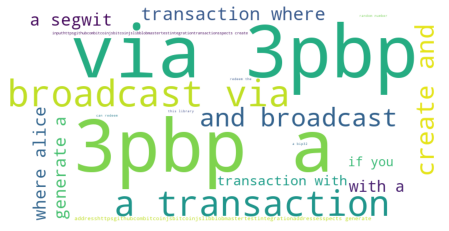

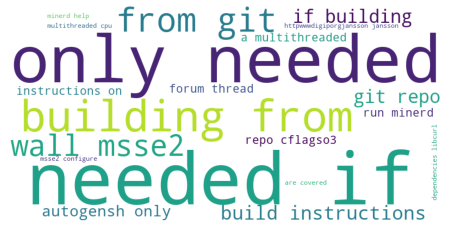

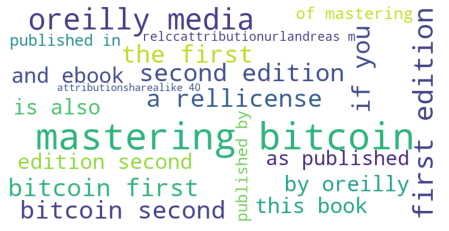

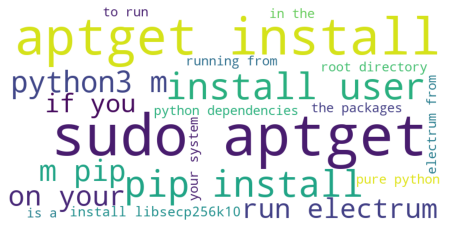

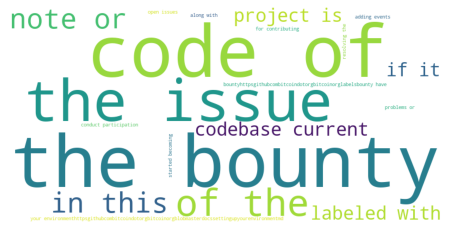

In [81]:
for language in languages_words_list:
    bigrams = pd.Series(nltk.bigrams(language.split())).value_counts().head(20)


    data = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [59]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_bigrams = pd.Series(nltk.bigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [60]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_trigrams = pd.Series(nltk.trigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in java_trigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

- I'm not a huge fan of the trigrams viz, maybe the bigrams loop.  
- Also, there are no words in the wiki words set

In [94]:
import networkx as nx
 

In [96]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
nx.shortest_path(G, 'A', 'D', weight='weight')
['A', 'B', 'D']

['A', 'B', 'D']

NetworkXError: random_state_index is incorrect

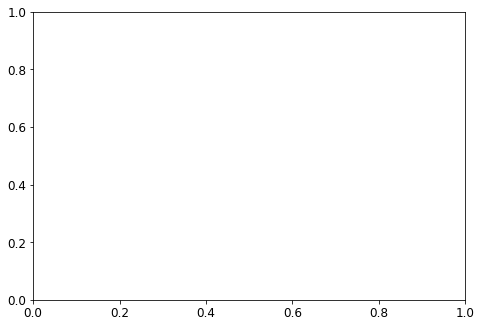

In [97]:
# Build a dataframe with 4 connections
sample = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(sample, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

<Figure size 1440x648 with 0 Axes>

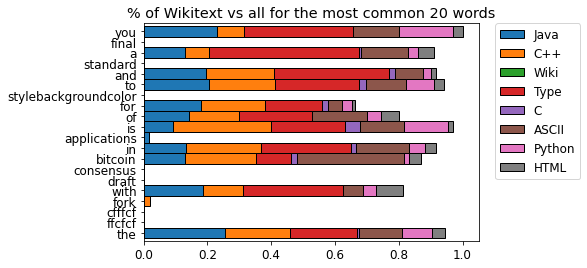

In [70]:
plt.figure(figsize=(20, 9))
plt.rc('font', size=12)

(word_counts.sort_values('ALL', ascending=False)
 .head(20)
 .apply(lambda row: row/row['ALL'], axis = 1)
 .drop(columns = 'ALL')
 .sort_values(by = 'Wiki')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Wikitext vs all for the most common 20 words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);